# Ayudantía 11: Redes Neuronales Convolucionales (CNN)

Por Pablo González Calderón, basado en [este cuadero de TensorFlow](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb#scrollTo=m7KBpffWzlxH)

14 de Noviembre de 2025

## Descarga de dataset e importación de librerías

Usaremos TensorFlow para entrenar y para obtener el dataset. Usaremos el dataset CIFAR10, que contiene 60.000 imágenes a color equidistribuidas en 10 clases. Hay 50.000 imágenes para el entrenamiento y 10.000 para el _testeo_.

Las 10 clases son airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

In [ ]:
# Importamos tensorflow
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt  # Usaremos matplotlib para graficar

In [ ]:
# Descargaremos el dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizamos los pixeles (para que tengan valores entre 0 y 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Visualicemos los datos

In [ ]:
train_images[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

Un poquito feo, ¿no? Mejor usemos matplotlib

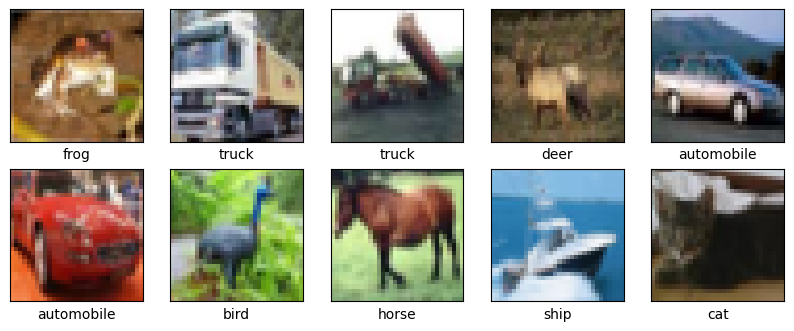

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # Todas las clases del dataset

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Creación de la CNN

### Base convolucional

Vamos a dividir las imágenes de 32x32 por canales RGB, de modo que la entrada es un tensor 32x32x3.

En primer lugar, añadiremos capas convolucionales y de max pooling alternadamente. La dimensión de los datos de entrada viene dada por la primera capa, así que ahí ingresaremos ``(32, 32, 3)``.

 Pueden ver el detalle de qué hace cada capa en https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [ ]:
model1 = models.Sequential()

model1.add(
    layers.InputLayer(
        shape=(32, 32, 3)       # Tamaño de la entrada
    )
)
model1.add(
    layers.Conv2D(
        32,                     # Cantidad de filtros (dimensión del espacio de salida)
        (3, 3),                 # Tamaño del kernel (filtro)
        activation='relu'       # Función de activación
        # input_shape=(32, 32, 3) # Tamaño de la entrada (deprecado)
    )
)
model1.add(
    layers.MaxPooling2D(
        (2, 2)                  # Tamaño del pool
                                # Tamaño de stride es igual al tamaño de pool, por defecto
    )
)
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

Podemos ver cómo va nuestra CNN

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Notemos que en las dimensiones `(height, width, channels)`, las componentes `height` y `width` tienden a disminuir. Típicamente, mientras el ancho y alto de los datos se reduce, es más asequible (computacionalmente) aumentar la cantidad de `channels` en las capas de convolución.

### Capas densas

Finalmente, una vez creadas las capas convolucionales de base, se debe "cerrar" el modelo con capas FC o Softmax. Para ello, recuerden que siempre es importante **aplanar la salida de la zona convolucional de la red.**

Ojo que como CIFAR10 tiene 10 clases, necesitamos que en la última capa hayan 10 neuronas (1 por cada clase).

In [ ]:
model1.add(layers.Flatten())                    # Aplanar la entrada
model1.add(layers.Dense(64, activation='relu')) # Capa FC con 64 neuronas y función de activación RELU
model1.add(layers.Dense(10))                    # Capa FC con 10 neuronas (usa funcioón de activación 'linear' por defecto)

Veamos cómo va la red

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compilación y entrenamiento del modelo

Antes de entrenar nuestra red neuronal, debemos compilarlo, dejándolo configurado para el entrenamiento. Para ello, usamos

- Un optimizador. Pueden ver todos los que hay en https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

- Una función de pérdida. Pueden ver todas las que hay en https://www.tensorflow.org/api_docs/python/tf/keras/losses

Luego, corremos una serie de _epochs_ de entrenamiento para obtener el modelo final entrenado.

Una _epoch_ es una iteración sobre todo el conjunto de datos de entrenamiento (a menos que se indique lo contrario).

In [ ]:
model1.compile(
    optimizer='adam',                                                     # Optimizar con el algoritmo de Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Usar Cross-Entropy como función de pérdida
                                                                          # NOTA: Si hubiésemos usado una capa Softmax al final, deberíamos marcar from_logits=False, pues
                                                                          # Softmax retornar probabilidades, no logits.
    metrics=['accuracy']                                                  # Medimos el desempeño con el accuracy
)

history = model1.fit(
    train_images,                               # Datos de entrenamiento
    train_labels,                               # Etiquetas de los datos
    epochs=10,                                  # Cantidad de epochs
    validation_data=(test_images, test_labels)  # Datos para la validación
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3426 - loss: 1.7772 - val_accuracy: 0.5541 - val_loss: 1.2489
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5583 - loss: 1.2341 - val_accuracy: 0.5864 - val_loss: 1.1451
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6227 - loss: 1.0594 - val_accuracy: 0.6446 - val_loss: 1.0268
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6709 - loss: 0.9435 - val_accuracy: 0.6683 - val_loss: 0.9563
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6922 - loss: 0.8756 - val_accuracy: 0.6829 - val_loss: 0.9262
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7197 - loss: 0.8035 - val_accuracy: 0.6876 - val_loss: 0.9039
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7357 - loss: 0.7523 - val_accuracy: 0.6968 - val_loss: 0.8773
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7491 - loss: 0.7192 -

## Evaluación del rendimiento del modelo

Revisamos cómo se comporta la _accuracy_ de los datos de entrenamiento y la _accuracy_ de los datos de validación (`val_accuracy`) conforme aumentan las _epochs._

313/313 - 1s - 2ms/step - accuracy: 0.6951 - loss: 0.8940


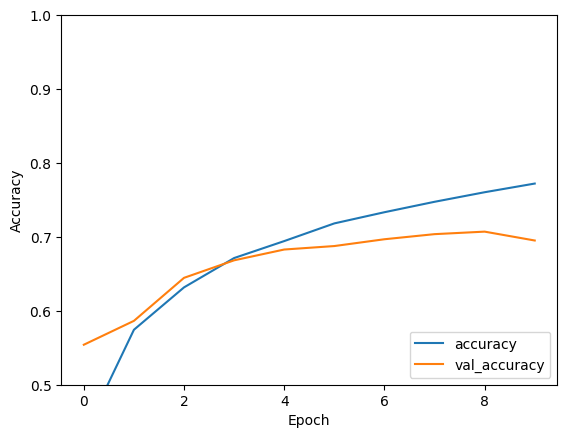

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

## Modificaciones a la CNN

Diferentes combinaciones de capas, tamaños de _kernels/pools,_ _epochs,_ etc. darán diferentes resultados. ¡Problemos otra combinación!

In [ ]:
model2 = models.Sequential()

model2.add(layers.InputLayer(shape=(32,32,3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,176 (508.50 KB)

 Trainable params: 130,176 (508.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.add(layers.Flatten())                    # Aplanar la entrada
model2.add(layers.Dense(64, activation='relu')) # Capa FC con 64 neuronas y función de activación RELU
model2.add(layers.Dense(32, activation='relu')) # Capa FC con 64 neuronas y función de activación RELU
model2.add(layers.Dense(10))                    # Capa FC con 10 neuronas (usa funcioón de activación 'linear' por defecto)

In [ ]:
model2.compile(
    optimizer='adadelta',                                                     # Optimizar con el algoritmo de Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Usar Cross-Entropy como función de pérdida
                                                                          # NOTA: Si hubiésemos usado una capa Softmax al final, deberíamos marcar from_logits=False, pues
                                                                          # Softmax retornar probabilidades, no logits.
    metrics=['accuracy']                                                  # Medimos el desempeño con el accuracy
)

history = model2.fit(
    train_images,                               # Datos de entrenamiento
    train_labels,                               # Etiquetas de los datos
    epochs=10,                                  # Cantidad de epochs
    validation_data=(test_images, test_labels)  # Datos para la validación
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1068 - loss: 2.3022 - val_accuracy: 0.1267 - val_loss: 2.2977
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1254 - loss: 2.2970 - val_accuracy: 0.1201 - val_loss: 2.2939
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1247 - loss: 2.2931 - val_accuracy: 0.1192 - val_loss: 2.2898
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1237 - loss: 2.2890 - val_accuracy: 0.1223 - val_loss: 2.2850
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1287 - loss: 2.2842 - val_accuracy: 0.1251 - val_loss: 2.2798
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1276 - loss: 2.2789 - val_accuracy: 0.1304 - val_loss: 2.2738
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1382 - loss: 2.2714 - val_accuracy: 0.1403 - val_loss: 2.2671
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1456 - loss: 2.2652 

313/313 - 1s - 2ms/step - accuracy: 0.1686 - loss: 2.2430


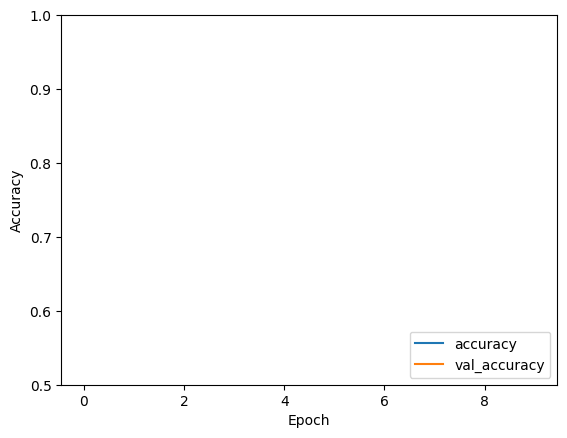

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

El rendimiento bajó :(. Debemos probar con mejores/menos capas

Veamos los hiperparámetros:

In [ ]:
for layer in model1.layers:
    print(f"Capa: {layer.name}")
    pesos = layer.get_weights()
    for i, p in enumerate(pesos):
        print(f"  Parámetro {i}: shape = {p.shape}, {p}")

Capa: conv2d
  Parámetro 0: shape = (3, 3, 3, 32), [[[[ 1.72856525e-01  1.58040430e-02  1.50554985e-01  1.36183292e-01
    -8.81662890e-02  2.77709477e-02 -2.77676564e-02  6.54675663e-02
    -1.94175523e-02  1.89665593e-02 -1.80942953e-01  1.26495911e-02
     7.22259283e-02 -1.82631984e-01 -2.46103704e-01  2.18988463e-01
     7.03782141e-02 -1.44499347e-01  2.81661451e-01 -1.90743163e-01
     9.38765109e-02 -3.07068340e-02 -6.99610859e-02  2.42262810e-01
    -1.31111890e-01  8.86230916e-02 -1.36755807e-02 -1.71393126e-01
    -9.44042653e-02  1.25596762e-01  2.97843106e-02  1.00758471e-01]
   [ 2.80617356e-01 -8.34616721e-02  2.28551716e-01 -4.27130684e-02
     2.01269407e-02 -1.47165179e-01 -6.77252635e-02  9.42030922e-02
     1.02957711e-01  6.22647218e-02  5.12892194e-02  1.24587893e-01
     6.43297210e-02 -2.42686972e-01 -1.60115629e-01  1.26677334e-01
    -1.17068201e-01  1.01415664e-01  2.40620181e-01 -2.10151523e-01
     1.47828877e-01  1.61504343e-01 -1.29210517e-01  1.43870786e